# Getting Started

### Import modules

In [1]:
from rlway.pyosrd.osrd import OSRD
from rlway.schedules import Schedule, schedule_from_osrd

# Import two CpAgents :
from rlway_cpagent.minizinc_agent.minizinc_agent import MinizincAgent
from rlway_cpagent.ortools_agent.ortools_agent import OrtoolsAgent

### Load a use case and add delays

In [2]:
# Load an OSRD use case
ref = OSRD(use_case='station_capacity2', dir='tmp')
# Clear the tmp delays
ref.reset_delays()
# Add a new delay to the use case
ref.add_delay('train0', time_threshold=100, delay=285.)
delayed = ref.delayed()

[11:44:40,608] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[11:44:40,662] [INFO]              [FullInfra] parsing infra
[11:44:40,781] [INFO]              [FullInfra] adaptation to kotlin
[11:44:40,848] [INFO]              [FullInfra] loading signals
[11:44:40,857] [INFO]              [FullInfra] building blocks
[11:44:40,865] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[11:44:40,891] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.0
[11:44:40,995] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.1
[11:44:41,005] [INFO]  [StandaloneSimulationCommand] All simulations completed
[11:44:41,006] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/results.json


### Visualize use case

In [3]:
# Convert the simulation in a format more suitable for visualization
delayed_schedule = schedule_from_osrd(delayed)

In [4]:
# Draw the infrastructure
delayed_schedule.draw_graph()

/home/cpombet/dev/cpagent/venv/lib/python3.10/site-packages/rlway/schedules/schedules.py:425: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  for u, v in zip(self.df.index, self.df.fillna(0).values)


<Axes: xlabel='Time'>

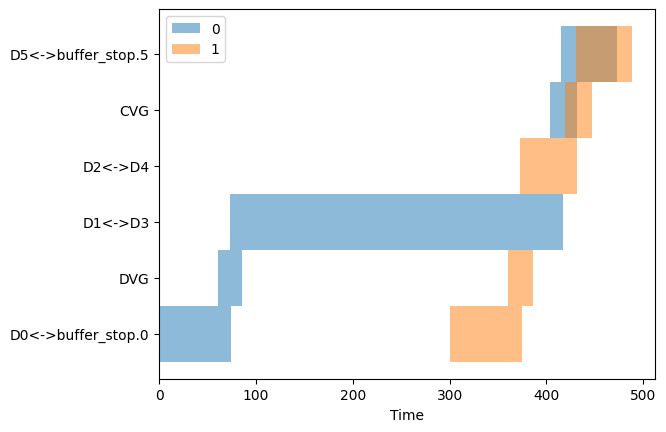

In [5]:
# Plot the space/time graph
delayed_schedule.plot()

### Compute an optimal regulation using OrtoolsAgent

In [6]:
ortools_regulated = ref.regulate(agent=OrtoolsAgent("ortools_agent"))
ortools_regulated_schedule = schedule_from_osrd(ortools_regulated)

52
52
52
[11:44:42,123] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[11:44:42,189] [INFO]              [FullInfra] parsing infra
[11:44:42,318] [INFO]              [FullInfra] adaptation to kotlin
[11:44:42,383] [INFO]              [FullInfra] loading signals
[11:44:42,392] [INFO]              [FullInfra] building blocks
[11:44:42,400] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/delayed/ortools_agent/simulation.json
[11:44:42,427] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.0
[11:44:42,530] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.1
[11:44:42,543] [INFO]  [StandaloneSimulationCommand] All simulations completed
[11:44:42,543] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/delayed/ortools_agent/results.json


### Compute an optimal regulation using MinizincAgent

In [7]:
minizinc_regulated = ref.regulate(agent=MinizincAgent("minizinc_agent"))
minizinc_regulated_schedule = schedule_from_osrd(minizinc_regulated)

52
52
52
[11:44:45,570] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[11:44:45,619] [INFO]              [FullInfra] parsing infra
[11:44:45,734] [INFO]              [FullInfra] adaptation to kotlin
[11:44:45,809] [INFO]              [FullInfra] loading signals
[11:44:45,818] [INFO]              [FullInfra] building blocks
[11:44:45,826] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/delayed/minizinc_agent/simulation.json
[11:44:45,850] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.0
[11:44:45,950] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.1
[11:44:45,959] [INFO]  [StandaloneSimulationCommand] All simulations completed
[11:44:45,959] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/delayed/minizinc_agent/results.json


## Compare output

<Axes: xlabel='Time'>

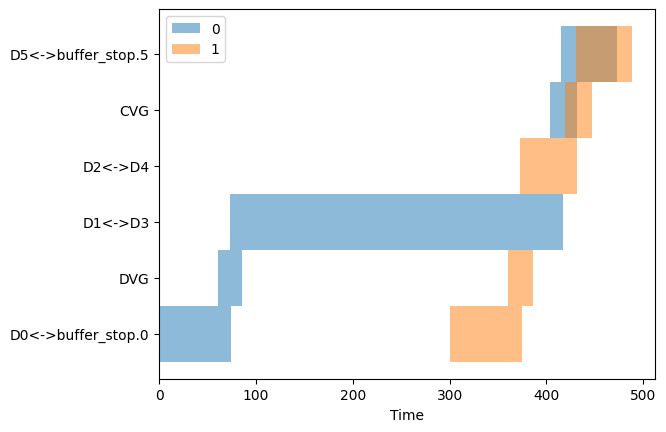

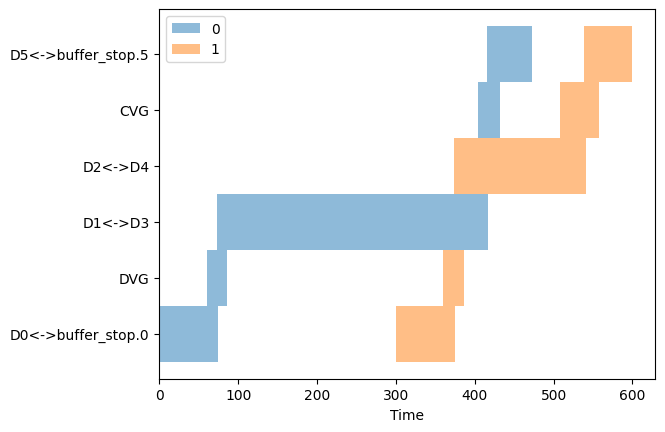

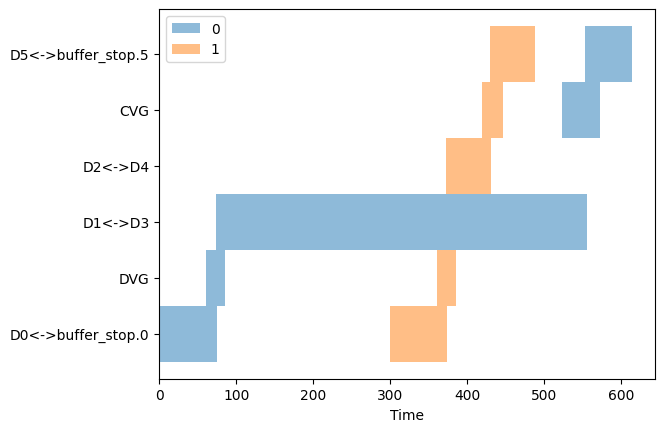

In [8]:
delayed_schedule.plot()
ortools_regulated_schedule.plot()
minizinc_regulated_schedule.plot()

Even if Minizinc and Ortools produce two different solutions, they are equivalent in regard to the objective function.

### 